In [80]:
#https://www.youtube.com/watch?v=5_6O2oDy5Jk
library(tidyverse)

In [2]:
library(malariaAtlas)

In [23]:
kenya_pr <- getPR(ISO = 'KEN', species = 'BOTH') %>%
                filter(!is.na(pr))

Confirming availability of PR data for: KEN...
PR points are available for KEN.
Attempting to download PR point data for Kenya ...
Data downloaded for KEN.


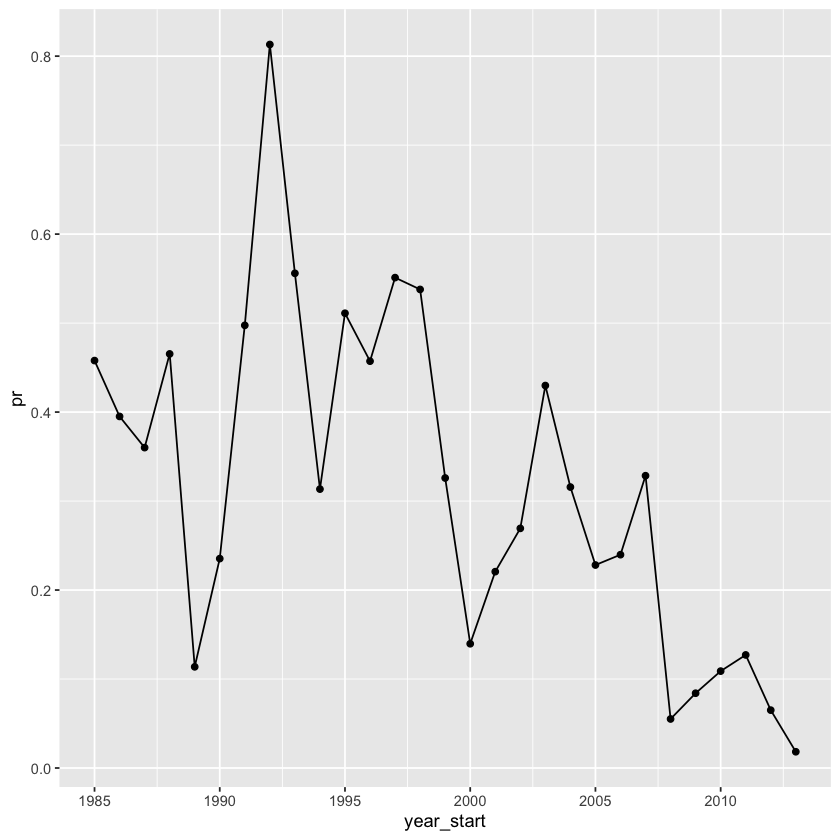

In [24]:
# total per year:
kenya_pr %>% filter(!is.na(year_start)) %>%
                group_by(year_start) %>% 
                summarise(examined = sum(examined), 
                          positive = sum(positive), 
                          pr = positive / examined, 
                          studies = n()) %>%
            ggplot(aes(year_start, pr)) +
            geom_point() + geom_line()

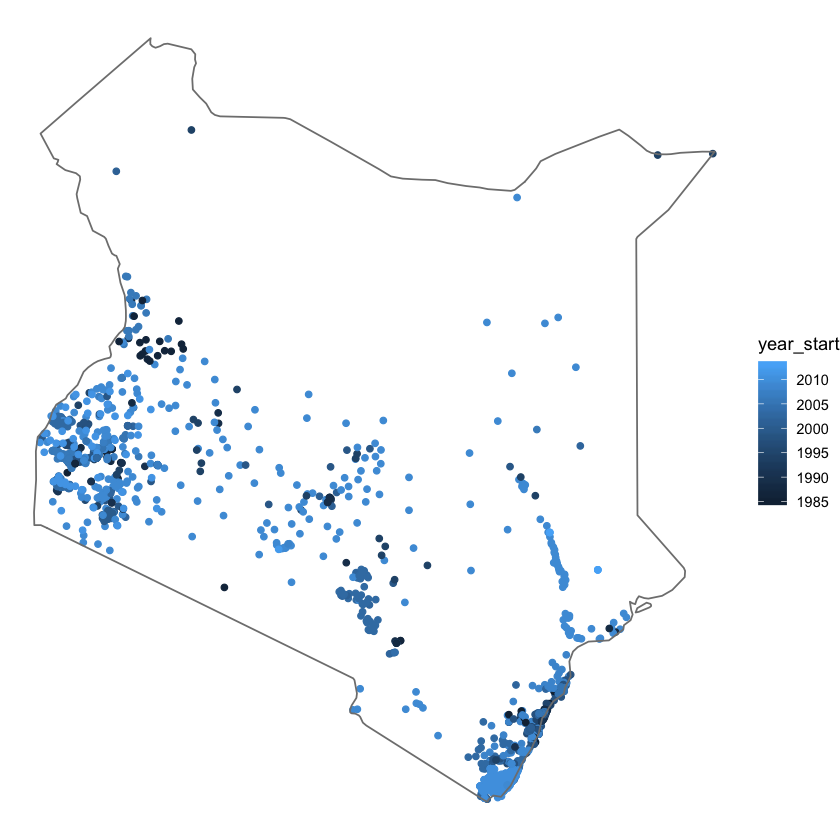

In [36]:
kenya_pr %>% ggplot(aes(longitude, latitude, color = year_start)) + 
                geom_point() + 
                borders(database = "world", regions = "kenya") +
                theme_void()

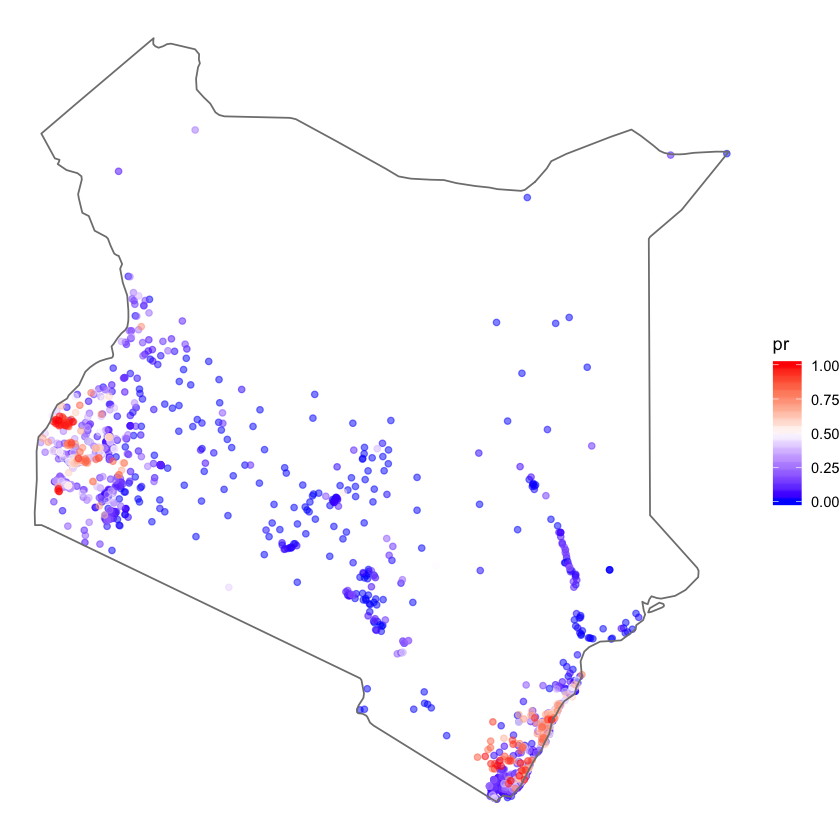

In [37]:
kenya_pr %>% arrange(pr) %>%
                ggplot(aes(longitude, latitude, color = pr)) + 
                geom_point(alpha = 0.5) + 
                scale_color_gradient2(low = 'blue', high = 'red', midpoint = .5) +
                borders(database = 'world', regions = 'kenya') +
                theme_void()

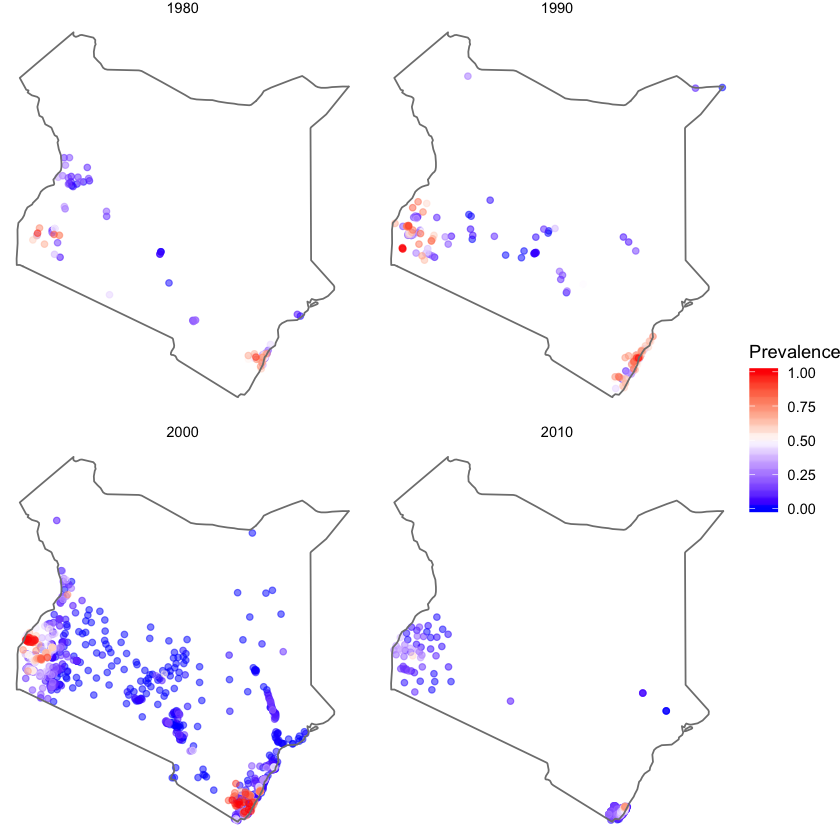

In [40]:
kenya_pr %>% arrange(pr) %>%
                mutate(decade = 10 * year_start %/% 10) %>%
                ggplot(aes(longitude, latitude, color = pr)) + 
                geom_point(alpha = 0.5) + 
                facet_wrap(~decade) +
                scale_color_gradient2(low = 'blue', high = 'red', midpoint = .5) +
                borders(database = 'world', regions = 'kenya') +
                theme_void() +
                labs(color = 'Prevalence')

## Aggregated Data:

In [65]:
malaria_inc <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv")
names(malaria_inc)

Parsed with column specification:
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)` = col_double()
)


[1] "Entity"                                                                            
[2] "Code"                                                                              
[3] "Year"                                                                              
[4] "Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"

In [66]:
malaria_inc_processed <- malaria_inc %>%                     
                                set_names(c('country', 'code', 'year', 'incidence')) 


head(malaria_inc_processed)

country,code,year,incidence
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,2000,107.10000000
Afghanistan,AFG,2005,46.50000000
Afghanistan,AFG,2010,23.90000000
Afghanistan,AFG,2015,23.60000000
Algeria,DZA,2000,0.03774626
Algeria,DZA,2005,0.00202141


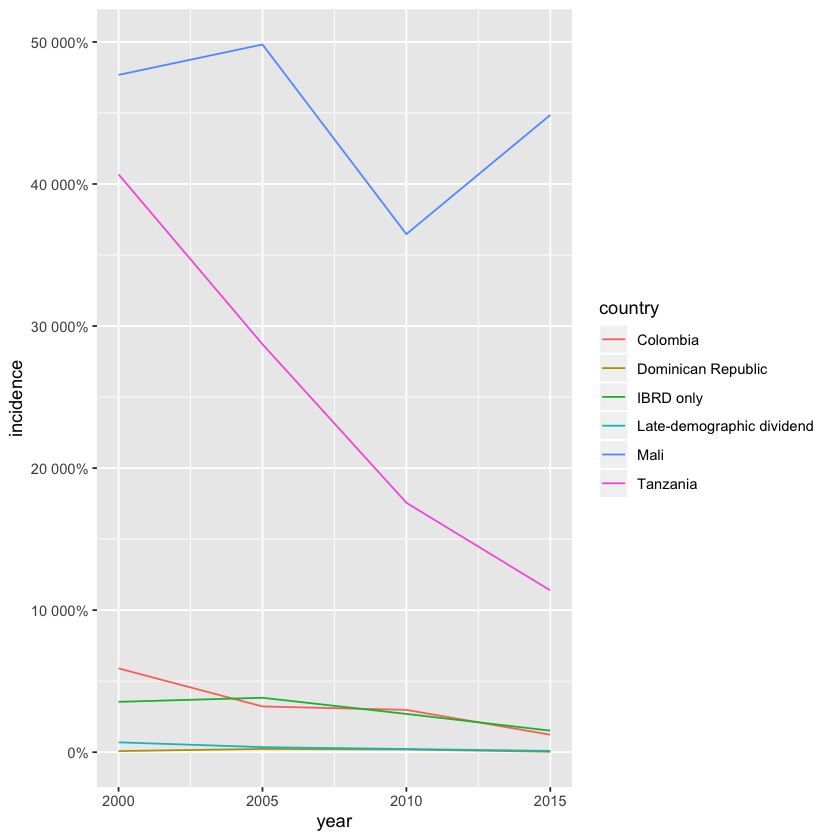

In [67]:
malaria_inc_processed %>% filter(country %in% sample(unique(country), 6)) %>%
                ggplot(aes(year, incidence, color = country)) +
                geom_line() +
                scale_y_continuous(labels = scales::percent_format())

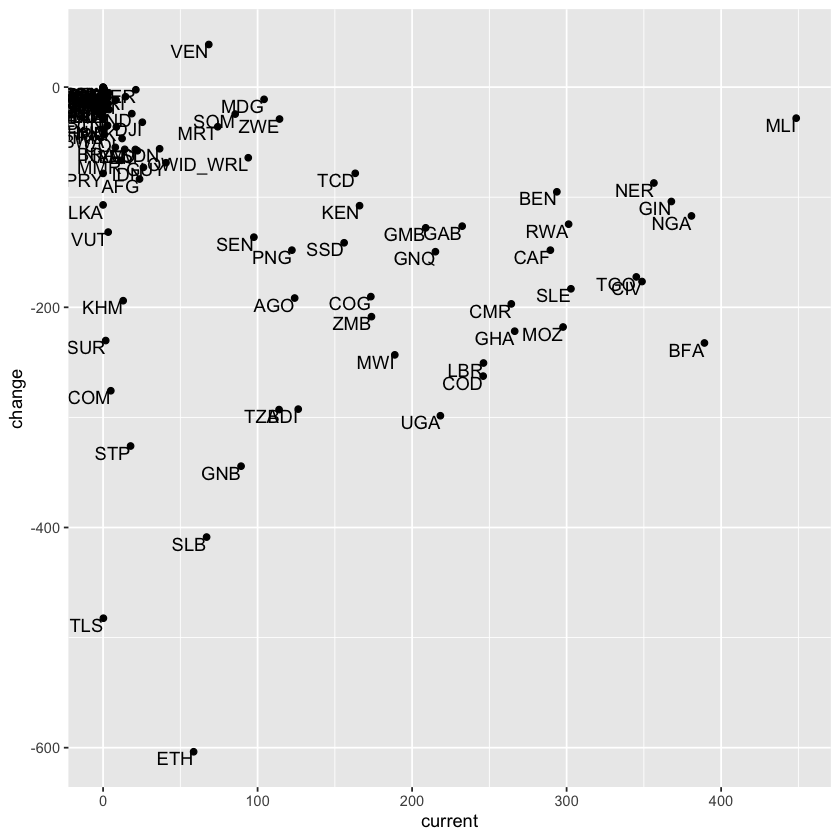

In [79]:
malaria_spread <- malaria_inc_processed %>% 
                        mutate(year = paste0('Y', year)) %>%
                        spread(year, incidence)


malaria_spread %>% 
                filter(country != 'Turkey', 
                       !is.na(code)) %>%
                mutate(current = Y2015, 
                       change = Y2015 - Y2000) %>%
                arrange(desc(change)) %>% 
                ggplot(aes(current, change)) + 
                geom_point() +
                geom_text(aes(label = code), vjust = 1, hjust = 1)